In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Data source acknowledgement https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data
# The key data attributes are The "Vehicle Sales and Market Trends Dataset" provides a comprehensive 
# collection of information pertaining to the sales transactions of various vehicles. This dataset 
# encompasses details such as the year, make, model, trim, body type, transmission type, VIN 
# (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior 
# and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.

df = pd.read_csv('Resources/car_prices.csv')
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [4]:
# Extract list of column headers
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [5]:
# Look for null values
print(df.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [6]:
df['year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983], dtype=int64)

In [7]:
df = df.dropna(subset=['make','mmr', 'odometer','condition','model']).reset_index(drop=True)

In [8]:
replacement_make_dict = {
    'lincoln': 'Lincoln',
    'bmw': 'BMW',
    'pontiac': 'Pontiac',
    'suzuki': 'Suzuki',
    'kia': 'Kia',
    'ford': 'Ford',
    'mitsubishi': 'Mitsubishi',
    'smart': 'Smart',
    'chevrolet': 'Chevrolet',
    'chrysler': 'Chrysler',
    'landrover': 'Land Rover',
    'cadillac': 'Cadillac',
    'land rover': 'Land Rover',
    'Landrover': 'Land Rover',
    'mercedes': 'Mercedes-Benz',
    'Mercedes': 'Mercedes-Benz',
    'mazda': 'Mazda',
    'toyota': 'Toyota',
    'lexus': 'Lexus',
    'honda': 'Honda',
    'nissan': 'Nissan',
    'porsche': 'Porsche',
    'dodge': 'Dodge',
    'subaru': 'Subaru',
    'oldsmobile': 'Oldsmobile',
    'hyundai': 'Hyundai',
    'jeep': 'Jeep',
    'acura': 'Acura',
    'volkswagen': 'Volkswagen',
    'audi': 'Audi',
    'gmc': 'GMC',
    'maserati':  'Maserati',
    'mercury': 'Mercury',
    'buick': 'Buick',
    'vw': 'Volkswagen',
    'plymouth': 'Plymouth',
    'dodge tk': 'Dodge',
    'mazda tk': 'Mazda',
    'hyundai tk': 'Hyundai',
    'mercedes-b': 'Mercedes-Benz',
    'chev truck': 'Chevrolet',
    'ford tk': 'Ford',
    'ford truck': 'Ford',
    'airstream': 'Airstream',
    'dot':'Dodge',
    'gmc truck': 'GMC'
    
    # Add more replacements as needed
}

df['make'] = df['make'].replace(replacement_make_dict)

In [9]:
replacement_body_dict = {
    'Beetle Convertible': 'Convertible',
    'CTS Coupe': 'Coupe',
    'CTS Wagon': 'Wagon',
    'CTS-V Coupe': 'Coupe',
    'CTS-V Wagon': 'Wagon',
    'E-Series Van': 'Van',
    'Elantra Coupe': 'Coupe',
    'G Convertible': 'Convertible',
    'G Coupe': 'Coupe',
    'G Sedan': 'Sedan',
    'G37 Convertible': 'Convertible',
    'G37 Coupe': 'Coupe',
    'Genesis Coupe': 'Coupe',
    'GranTurismo Convertible': 'Convertible',
    'Koup': 'Coupe',
    'Promaster Cargo Van': 'Van',
    'Q60 Convertible': 'Convertible',
    'Q60 Coupe': 'Coupe',
    'TSX Sport Wagon': 'Wagon',
    'Transit Van' : 'Van',
    'beetle convertible': 'Convertible',
    'convertible': 'Convertible',
    'coupe': 'Coupe',
    'cts coupe': 'Coupe',
    'cts wagon': 'Wagon',
    'cts-v coupe': 'Coupe',
    'e-series van': 'Van',
    'elantra coupe': 'Coupe',
    'g convertible': 'Convertible',
    'g coupe': 'Coupe',
    'g sedan': 'Sedan',
    'g37 convertible': 'Convertible',
    'g37 coupe': 'Coupe',
    'genesis coupe': 'Coupe',
    'granturismo convertible':'Convertible',
    'minivan': 'Minivan',
    'promaster cargo van': 'Van',
    'q60 convertible': 'Convertible',
    'q60 coupe': 'Coupe',
    'sedan': 'Sedan',
    'suv': 'SUV',
    'transit van': 'Van',
    'tsx sport wagon': 'Wagon',
    'van': 'Van',
    'wagon': 'Wagon',
    'koup': 'Coupe',
    'Ram Van': 'Van',
    'hatchback': 'Hatchback',
    'Double Cab': 'Crew_Truck',
    'CrewMax Cab': 'Crew_Truck',
    'Access Cab': 'Ext_Truck',
    'King Cab': 'Crew_Truck',
    'SuperCrew': 'Crew_Truck',
    'Extended Cab': 'Ext_Truck',
    'SuperCab': 'Crew_Truck',
    'Regular Cab': 'Truck',
    'Quad Cab': 'Crew_Truck',
    'Club Cab': 'Crew_Truck',
    'Xtracab': 'Ext_Truck',
    'Mega Cab': 'Crew_Truck',
    'Cab Plus 4': 'Ext_Truck',
    'Cab Plus': 'Ext_Truck',
    'regular-cab': 'Truck',
    'king cab': 'Crew_Truck',
    'supercrew': 'Crew_Truck',
    'crew cab': 'Crew_Truck',
    'double cab': 'Crew_Truck',
    'regular cab': 'Truck',
    'quad cab': 'Crew_Truck',
    'supercab': 'Ext_Truck',
    'extended cab': 'Ext_Truck',
    'crewmax cab': 'Crew_Truck',
    'access cab': 'Ext_Truck',
    'mega cab': 'Crew_Truck',
    'xtracab': 'Ext_Truck',
    'club cab': 'Crew_Truck',
    'cab plus 4': 'Ext_Truck',
    'Crew Cab': 'Crew_Truck', 
    }

df['body'] = df['body'].replace(replacement_body_dict)

In [10]:
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew_Truck', 'Minivan', nan, 'Van', 'Ext_Truck', 'Truck'],
      dtype=object)

In [11]:
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Buick', 'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'Smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Geo', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Airstream', 'Aston Martin', 'Fisker', 'Daewoo', 'Lamborghini',
       'Lotus'], dtype=object)

In [12]:
# List of makes to be removed
makes_to_remove = ['Maserati', 'Bentley', 'Plymouth', 'Aston Martin', 'Tesla', 'Ferrari', 'Geo', 
                   'Rolls-Royce', 'Fisker', 'Lamborghini', 'Daewoo', 'Airstream', 'Lotus']

# Directly modify df by filtering out the unwanted rows
df = df[~df['make'].isin(makes_to_remove)]


In [13]:
df = df.dropna(subset=['body']).reset_index(drop=True)

In [14]:
# Filter out rows where 'transmission' is 'sedan' (case-insensitive) and drop NaN values in 'transmission'
df = df[df['transmission'].notna() & (df['transmission'].str.lower() != 'sedan')]


In [15]:
df = df[(df['color'].notna()) & (df['color'] != '—')]

In [16]:
df['color'] = df['color'].replace({'off-white': 'cream'})



In [17]:
unique_interior = df['interior'].unique()
print(unique_interior)

['black' 'beige' 'tan' 'brown' '—' 'gray' 'burgundy' 'white' 'silver'
 'off-white' 'red' 'yellow' 'green' 'purple' 'blue' 'orange' 'gold']


In [18]:
df['interior'] = df['interior'].replace({'off-white': 'cream'})



In [19]:
df = df[(df['interior'].notna()) & (df['interior'] != '—')]

In [20]:
# Look for null values
print(df.isnull().sum())

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [23]:
df = df.drop(['vin', 'saledate', 'condition', 'seller', 'trim', 'model', 'state' ], axis=1)

In [24]:
# # # Create a scaler object
# scaler = StandardScaler()

# df_scaled = StandardScaler().fit_transform(df[['odometer','mmr']])
 
# df_scaled

In [25]:
# # Creating a DataFrame with with the scaled data
# # transformed_df = pd.DataFrame(df_scaled, columns=['odometer','mmr'], index=df.index)
# transformed_df = pd.DataFrame(df_scaled, columns=['odometer','mmr'])

# # Display sample data
# transformed_df.head(5)

In [26]:
# transformed_df.hist(bins=60, figsize=(20,20))

In [27]:
# Transform the "Method" column using get_dummies()
df_transmission = pd.get_dummies(df['transmission'])

# Display the transformed data
df_transmission.head(5)

,automatic,manual
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [28]:

# Look for null values
print(df_transmission.isnull().sum())



automatic    0
manual       0
dtype: int64


In [29]:

df_model = pd.concat([df[['year', 'make', 'body', 'color', 'interior', 'sellingprice', 'odometer']], df_transmission[['automatic']]], axis=1)


# df_model = pd.concat([transformed_df, df_transmission], axis=1)




In [30]:
df_model.head()

,year,make,body,color,interior,sellingprice,odometer,automatic
0,2015,Kia,SUV,white,black,21500.0,16639.0,True
1,2015,Kia,SUV,white,beige,21500.0,9393.0,True
2,2014,BMW,Sedan,gray,black,30000.0,1331.0,True
3,2015,Volvo,Sedan,white,black,27750.0,14282.0,True
4,2014,BMW,Sedan,gray,black,67000.0,2641.0,True


In [31]:
# Look for null values
print(df_model.isnull().sum())

year            0
make            0
body            0
color           0
interior        0
sellingprice    0
odometer        0
automatic       0
dtype: int64


In [32]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440066 entries, 0 to 440065
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440066 non-null  int64  
 1   make          440066 non-null  object 
 2   body          440066 non-null  object 
 3   color         440066 non-null  object 
 4   interior      440066 non-null  object 
 5   sellingprice  440066 non-null  float64
 6   odometer      440066 non-null  float64
 7   automatic     440066 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 23.9+ MB


In [33]:
# Use Pandas .astype("category").cat.codes for single column category encoding
columns_to_encode = ["make",
                     "color",
                     "interior"]

# Copy car_data
df_model_cat_codes = df_model.copy()

# Loop through columns_to_encode and convert the columns to category codes
for column in columns_to_encode:
    df_model_cat_codes[column] = df_model_cat_codes[column].astype("category").cat.codes

df_model_cat_codes.head()

,year,make,body,color,interior,sellingprice,odometer,automatic
0,2015,18,SUV,17,1,21500.0,16639.0,True
1,2015,18,SUV,17,0,21500.0,9393.0,True
2,2014,2,Sedan,8,1,30000.0,1331.0,True
3,2015,40,Sedan,17,1,27750.0,14282.0,True
4,2014,2,Sedan,8,1,67000.0,2641.0,True


In [34]:
df_model_cat_codes.dtypes

year              int64
make               int8
body             object
color              int8
interior           int8
sellingprice    float64
odometer        float64
automatic          bool
dtype: object

In [35]:
# Look for null values
print(df_model_cat_codes.isnull().sum())

year            0
make            0
body            0
color           0
interior        0
sellingprice    0
odometer        0
automatic       0
dtype: int64


In [36]:
# Extract list of column headers
df.columns

Index(['year', 'make', 'body', 'transmission', 'odometer', 'color', 'interior',
       'mmr', 'sellingprice'],
      dtype='object')

In [37]:
# Number of unique values
unique_values = df[['year', 'make', 'body', 'transmission', 'odometer', 'color', 'interior',
       'mmr', 'sellingprice']].nunique()

# Displaying the results
print("Number of unique values:")
print(unique_values)

Number of unique values:
year                26
make                41
body                11
transmission         2
odometer        157678
color               19
interior            16
mmr               1076
sellingprice      1750
dtype: int64


In [38]:
# Inspect data types, columns, assess missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440066 entries, 0 to 440065
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440066 non-null  int64  
 1   make          440066 non-null  object 
 2   body          440066 non-null  object 
 3   transmission  440066 non-null  object 
 4   odometer      440066 non-null  float64
 5   color         440066 non-null  object 
 6   interior      440066 non-null  object 
 7   mmr           440066 non-null  float64
 8   sellingprice  440066 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.2+ MB


In [39]:
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew_Truck', 'Minivan', 'Van', 'Ext_Truck', 'Truck'], dtype=object)

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'odometer'}>],
       [<Axes: title={'center': 'mmr'}>,
        <Axes: title={'center': 'sellingprice'}>]], dtype=object)

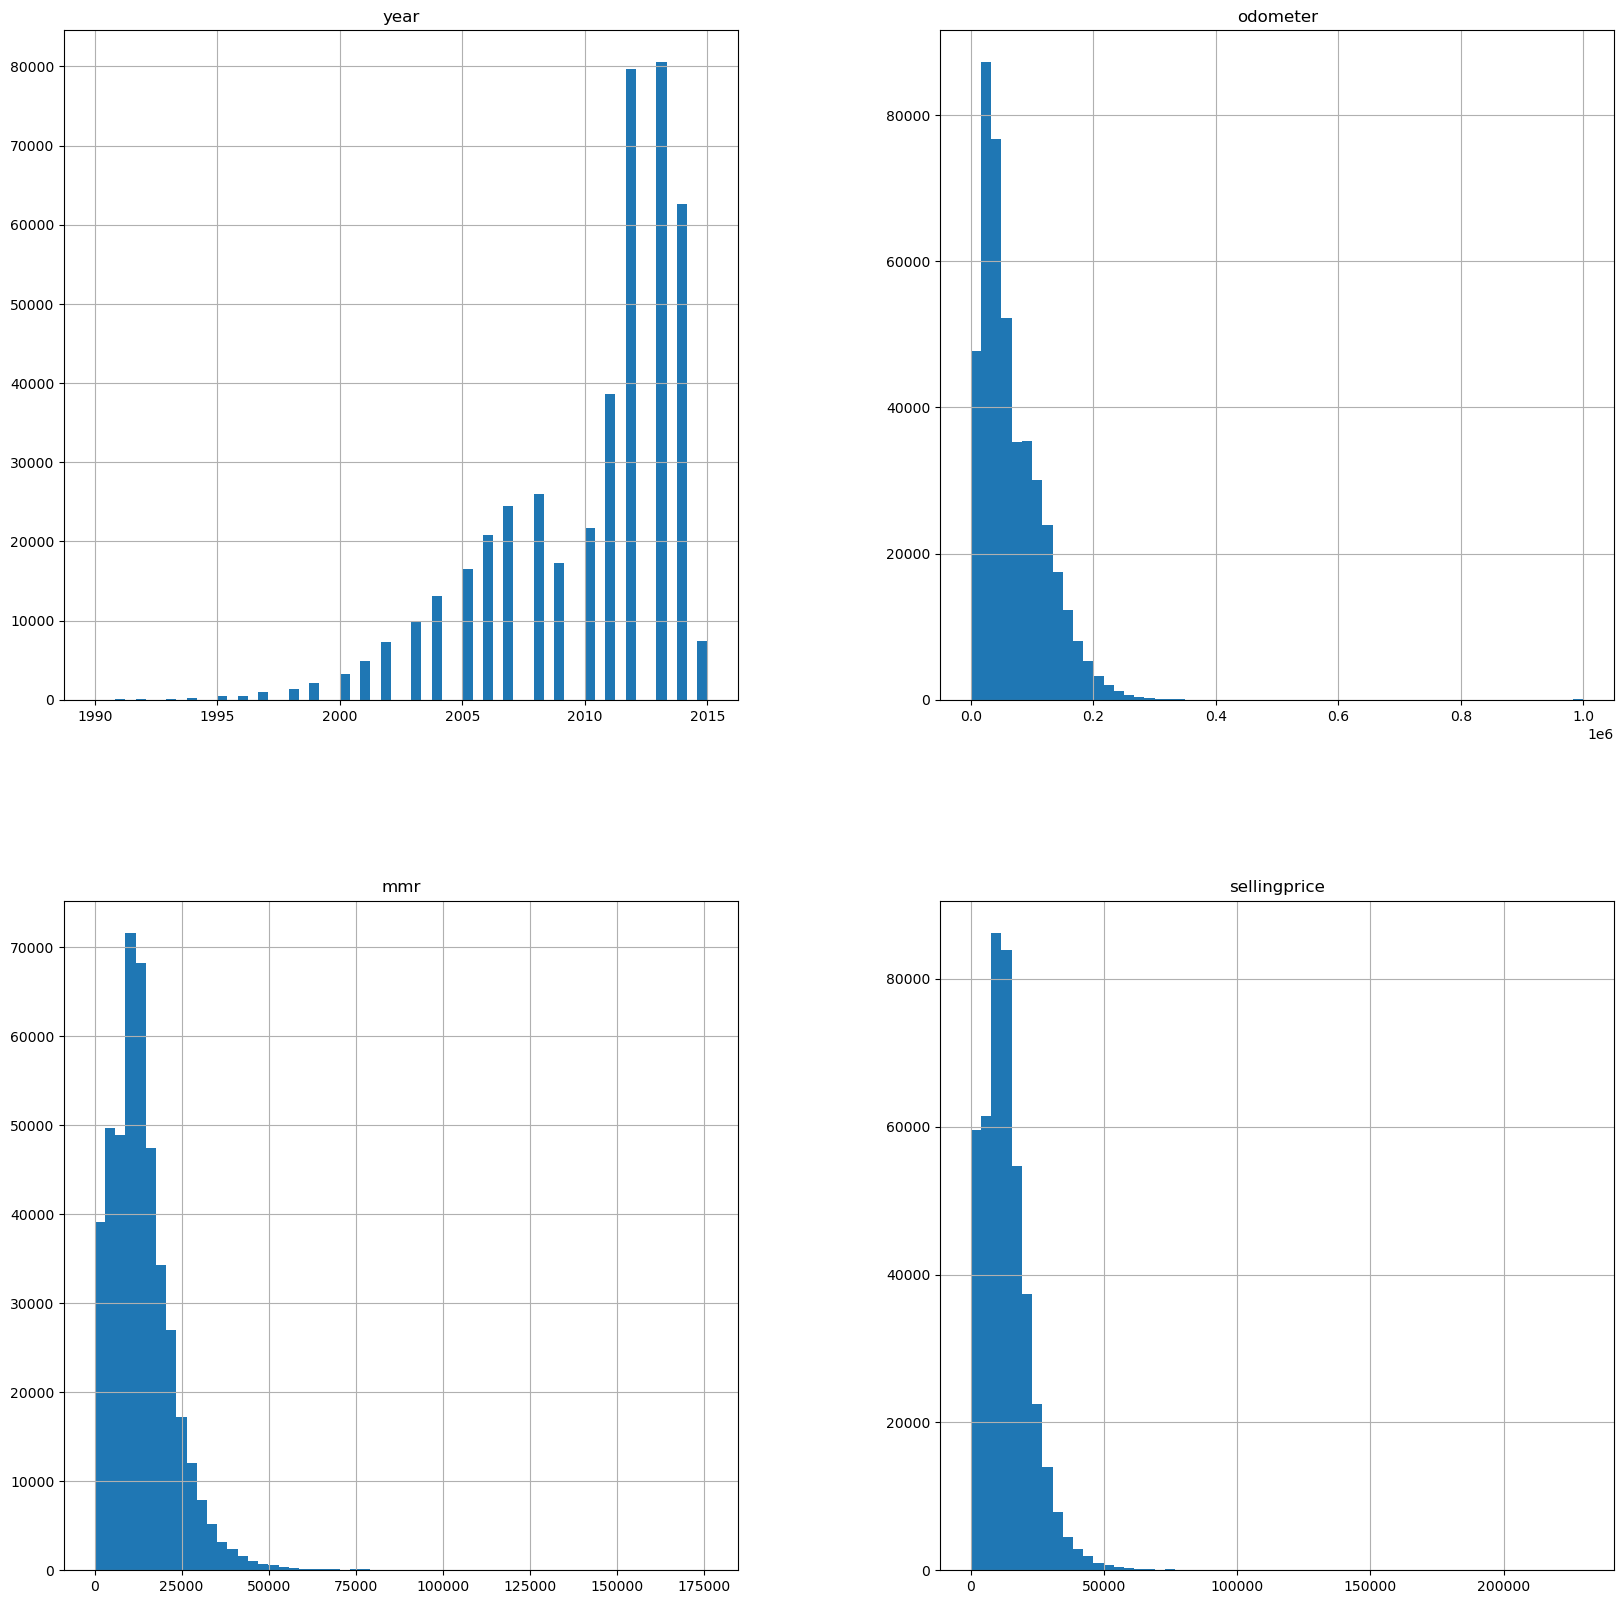

In [40]:
df.hist(bins=60, figsize=(20,20))

In [41]:
df_model_cat_codes.to_csv('Resources/model_car_prices_no_mmr.csv', index=False)

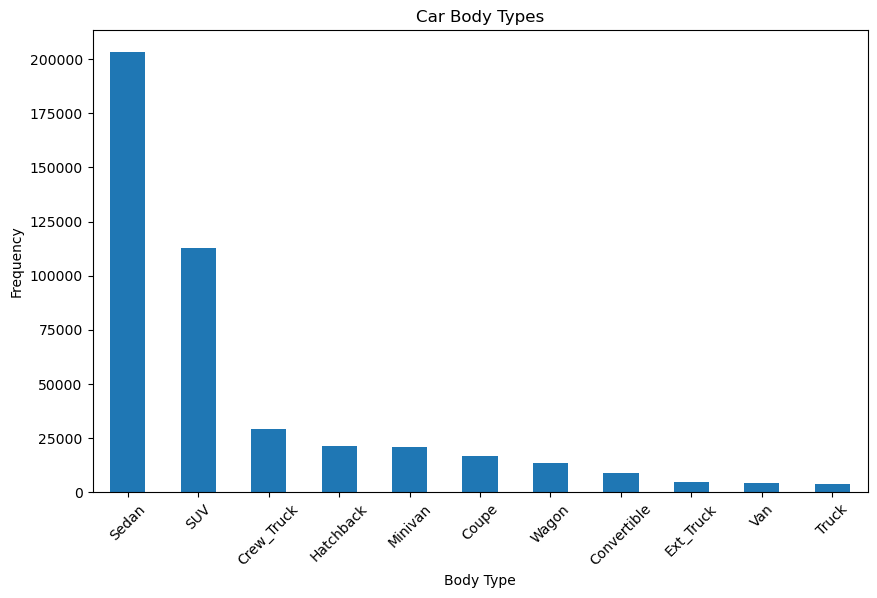

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'body' is the column with car body types
# If you haven't already loaded your data into a DataFrame, you would need to do that first.

# Calculate the counts of each type
body_counts = df_model_cat_codes['body'].value_counts()

# Plotting
plt.figure(figsize=(10, 6)) # Adjust the size as needed
body_counts.plot(kind='bar')
plt.title('Car Body Types')
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45) # Rotate labels to make them readable
plt.show()
